In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

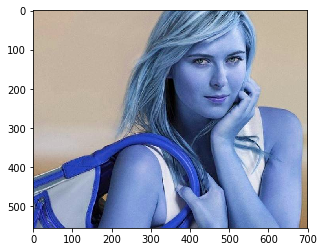

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

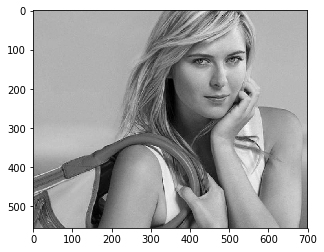

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

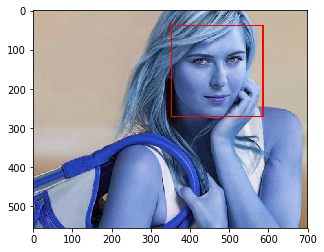

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

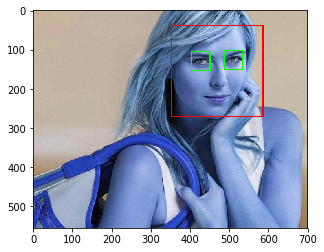

In [10]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

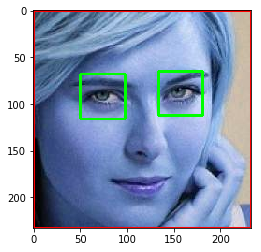

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_croppedimage_if2eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    return None
        

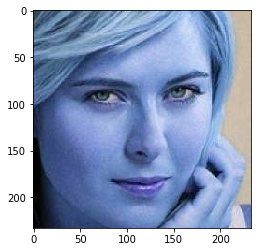

In [13]:
cropp=get_croppedimage_if2eyes('./test_images/sharapova1.jpg')
plt.imshow(cropp)

In [14]:
cropp_false=get_croppedimage_if2eyes('./test_images/sharapova2.JPG')
cropp_false

In [15]:
path_to_dataset='./dataset/'
path_to_crop_folder='./dataset/cropped/'

In [16]:
import os

In [17]:
image_dirs=[]
for entry in os.listdir(path_to_dataset):
    if os.path.isdir(os.path.join(path_to_dataset,entry)):
        image_dirs.append(os.path.join(path_to_dataset,entry))

In [18]:
image_dirs

['./dataset/roger_federer',
 './dataset/.ipynb_checkpoints',
 './dataset/virat_kohli',
 './dataset/maria_sharapova',
 './dataset/serena_williams',
 './dataset/lionel_messi']

In [19]:
image_dirs.pop(1)
image_dirs

['./dataset/roger_federer',
 './dataset/virat_kohli',
 './dataset/maria_sharapova',
 './dataset/serena_williams',
 './dataset/lionel_messi']

In [20]:
import shutil
if os.path.exists(path_to_crop_folder):
    shutil.rmtree(path_to_crop_folder)
    
os.mkdir(path_to_crop_folder)

In [21]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in image_dirs:
    count=1
    celeb_name=img_dir.split('/')[-1]
    print(celeb_name)
    
    celebrity_file_names_dict[celeb_name]=[]
    
    for entry in os.listdir(img_dir):
        path=os.path.join(img_dir,entry)        
        roi_color=get_croppedimage_if2eyes(path)
        
        if roi_color is not None:
            cropped_folder=path_to_crop_folder+celeb_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating",cropped_folder)
            
            cropped_file_name=celeb_name+str(count)+".png"
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celeb_name].append(cropped_file_path)
            count+=1
            
            

roger_federer
('generating', './dataset/cropped/roger_federer')
virat_kohli
('generating', './dataset/cropped/virat_kohli')
maria_sharapova
('generating', './dataset/cropped/maria_sharapova')
serena_williams
('generating', './dataset/cropped/serena_williams')
lionel_messi
('generating', './dataset/cropped/lionel_messi')


In [22]:
import numpy as np
import pywt
import cv2

In [23]:
def w2d(img,mode='haar',level=1):
    imageArray=img
    
    imageArray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    imageArray=np.float32(imageArray)
    imageArray/=255
    
    coeffs=pywt.wavedec2(imageArray,mode,level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    imageArray_H=pywt.waverec2(coeffs_H,mode)
    imageArray_H*=255
    imageArray_H=np.uint8(imageArray_H)
    
    return imageArray_H

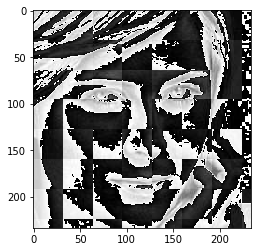

In [24]:
img_har=w2d(cropp,'db1',5)
plt.imshow(img_har,cmap='gray')

In [25]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [26]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    
    for entry in os.listdir(img_dir):
        file_list.append(os.path.join(img_dir,entry))
    
    celebrity_file_names_dict[celebrity_name]=file_list
    
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi19.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi32.png',
  './dataset/cropped/lionel_messi/lionel_messi36.png',
  './dataset/cropped/lionel_messi/lionel_messi27.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi21.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi25.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  './dataset/cropped/lionel_messi/lionel_messi34.png',

In [27]:
class_dict={}
count=0

for name in celebrity_file_names_dict.keys():
    class_dict[name]=count
    count+=1

class_dict

{'lionel_messi': 3,
 'maria_sharapova': 4,
 'roger_federer': 1,
 'serena_williams': 0,
 'virat_kohli': 2}

In [28]:
X=[]
y=[]

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(scaled_raw_img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [29]:
len(X)

165

In [30]:
len(y)

165

In [31]:
32*32*3+32*32

4096

In [32]:
len(X[0])

4096

In [33]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(165, 4096)

# SVM Classification starts

In [75]:
import sklearn

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,random_state=0,test_size=0.3)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)


0.84

In [94]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.71      0.62      0.67         8
           2       0.92      0.85      0.88        13
           3       1.00      0.80      0.89        10
           4       0.79      1.00      0.88        11

   micro avg       0.84      0.84      0.84        50
   macro avg       0.84      0.83      0.83        50
weighted avg       0.85      0.84      0.84        50



In [95]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [96]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [97]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/home/ananta/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/ananta/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/ananta/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,model,best_score,best_params
0,logistic_regression,0.895652,{u'logisticregression__C': 1}
1,svm,0.869565,"{u'svc__kernel': u'linear', u'svc__C': 1}"
2,random_forest,0.739130,{u'randomforestclassifier__n_estimators': 10}


In [98]:
best_estimators

{'logistic_regression': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='auto',
           n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
           tol=0.0001, verbose=0, warm_start=False))]),
 'random_forest': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min...obs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))]),
 'svm': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_s

In [99]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.88

In [100]:
best_estimators['svm'].score(X_test,y_test)

0.88

In [101]:
best_clf=best_estimators['logistic_regression']

In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  1],
       [ 1,  6,  0,  0,  1],
       [ 0,  1, 11,  0,  1],
       [ 0,  0,  0,  9,  1],
       [ 0,  0,  0,  0, 11]])

Text(69,0.5,'Truth')

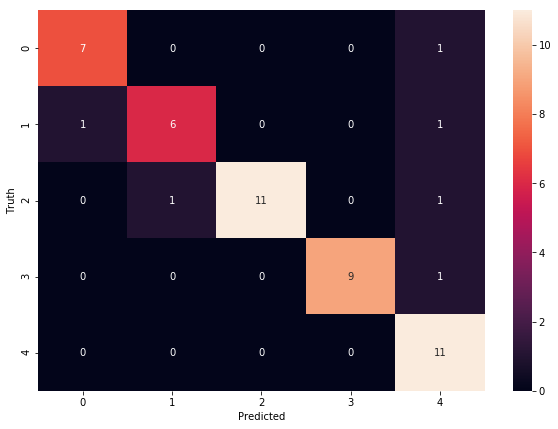

In [104]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
class_dict

{'lionel_messi': 3,
 'maria_sharapova': 4,
 'roger_federer': 1,
 'serena_williams': 0,
 'virat_kohli': 2}

In [106]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [107]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))